# imports functions

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
import pandas as pd

,2.453899999999999970e-01,2.177399999999999891e-01,2.016100000000000114e-01,2.016100000000000114e-01.1,2.477000000000000035e-01,3.283400000000000207e-01,3.951600000000000112e-01,3.928599999999999870e-01,3.352499999999999925e-01,3.398599999999999954e-01,3.444699999999999984e-01,2.822600000000000109e-01,2.661299999999999777e-01,2.661299999999999777e-01.1,3.260399999999999965e-01,2.891699999999999826e-01,8.006900000000000128e-01,8.006900000000000128e-01.1,8.006900000000000128e-01.2,7.983900000000000441e-01,7.315700000000000536e-01,6.324899999999999967e-01,6.002300000000000413e-01,6.601399999999999491e-01,7.016099999999999559e-01,7.085299999999999931e-01,7.154399999999999649e-01,7.430900000000000283e-01,7.500000000000000000e-01,7.500000000000000000e-01.1,7.223500000000000476e-01,6.693500000000000005e-01,2.062199999999999867e-01,2.661299999999999777e-01.2,3.813400000000000123e-01,4.205099999999999949e-01,4.988500000000000156e-01,3.145200000000000218e-01,5.311099999999999710e-01,4.527599999999999958e-01,...,8.306499999999999995e-01,8.629000000000000004e-01,8.836399999999999810e-01,9.343299999999999939e-01,9.343299999999999939e-01.1,9.251200000000000534e-01,8.790299999999999780e-01,8.790299999999999780e-01.1,9.182000000000000162e-01,8.513800000000000257e-01,8.559900000000000286e-01,7.085299999999999931e-01.1,7.085299999999999931e-01.2,5.979299999999999615e-01.1,6.117500000000000160e-01,7.822599999999999554e-01,7.891700000000000381e-01,9.066800000000000415e-01,1.486200000000000021e-01,1.509199999999999986e-01,9.792599999999999916e-02,7.949299999999999422e-02,7.949299999999999422e-02.1,1.094500000000000056e-01,1.232700000000000046e-01,7.718899999999999373e-02,8.179699999999999471e-02,1.486200000000000021e-01.1,1.486200000000000021e-01.2,1.417100000000000026e-01,8.870999999999999719e-02,9.562199999999999867e-02,2.453899999999999970e-01.1,1.947000000000000119e-01,1.693500000000000005e-01,1.555300000000000016e-01,2.384799999999999975e-01,3.306499999999999995e-01,9.562199999999999867e-02.1,9.101399999999999768e-02
0,0.81725,0.76462,0.69737,0.58041,0.49561,0.44883,0.48099,0.57164,0.62135,0.71199,0.81433,0.82602,0.75,0.63596,0.54825,0.65643,0.71491,0.64181,0.50146,0.36988,0.25,0.18275,0.27047,0.34649,0.42251,0.53947,0.63304,0.72076,0.63596,0.46345,0.35526,0.28509,0.94298,0.8962,0.8962,0.94591,0.86404,0.93421,0.72076,0.74415,...,0.18275,0.10965,0.27924,0.30848,0.19444,0.43421,0.43421,0.58626,0.71491,0.8348,0.94006,0.94298,0.87281,0.93129,0.83187,0.82895,0.8962,0.89912,0.92251,0.85819,0.85819,0.91374,0.77632,0.79678,0.67982,0.6886,0.58626,0.58041,0.5307,0.41959,0.49269,0.36696,0.3962,0.29678,0.22368,0.13596,0.12427,0.12427,0.2617,0.20322
1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.0000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000


In [ ]:
import autograd.numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from inspect import signature

In [ ]:
def activation(a):
  return np.tanh(a)

In [ ]:
import autograd.numpy as np
from autograd import value_and_grad 
from autograd import hessian
from autograd.misc.flatten import flatten_func
from IPython.display import clear_output
from timeit import default_timer as timer
import time
def gradient_descent(g,w,x_train,y_train,x_val,y_val,alpha,max_its,batch_size,**kwargs): 
    verbose = True
    if 'verbose' in kwargs:
        verbose = kwargs['verbose']
    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = value_and_grad(g_flat)

    # record history
    num_train = y_train.size
    num_val = y_val.size
    w_hist = [unflatten(w)]
    train_hist = [g_flat(w,x_train,y_train,np.arange(num_train))]
    val_hist = [g_flat(w,x_val,y_val,np.arange(num_val))]

    # how many mini-batches equal the entire dataset?
    num_batches = int(np.ceil(np.divide(num_train, batch_size)))

    # over the line
    for k in range(max_its):                   
        # loop over each minibatch
        start = timer()
        train_cost = 0
        for b in range(num_batches):
            # collect indices of current mini-batch
            batch_inds = np.arange(b*batch_size, min((b+1)*batch_size, num_train))
            
            # plug in value into func and derivative
            cost_eval,grad_eval = grad(w,x_train,y_train,batch_inds)
            grad_eval.shape = np.shape(w)
    
            # take descent step with momentum
            w = w - alpha*grad_eval

        end = timer()
        
        # update training and validation cost
        train_cost = g_flat(w,x_train,y_train,np.arange(num_train))
        val_cost = g_flat(w,x_val,y_val,np.arange(num_val))

        # record weight update, train and val costs
        w_hist.append(unflatten(w))
        train_hist.append(train_cost)
        val_hist.append(val_cost)

        if verbose == True:
            print ('step ' + str(k+1) + ' done in ' + str(np.round(end - start,1)) + ' secs, train cost = ' + str(np.round(train_hist[-1][0],4)) + ', val cost = ' + str(np.round(val_hist[-1][0],4)))

    if verbose == True:
        print ('finished all ' + str(max_its) + ' steps')
        #time.sleep(1.5)
        #clear_output()
    return w_hist,train_hist,val_hist

In [ ]:
# import standard plotting and animation
import autograd.numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

def plot_cost_histories(train_cost_histories,val_cost_histories,start):        
        # initialize figure
        fig = plt.figure(figsize = (10,3))

        # create subplot with 1 panel
        gs = gridspec.GridSpec(1, 1) 
        ax = plt.subplot(gs[0]); 

        # run through input histories, plotting each beginning at 'start' iteration
        for c in range(len(train_cost_histories)):
            train_history = train_cost_histories[c]
            val_history = val_cost_histories[c]

            # plot train cost function history
            ax.plot(np.arange(start,len(train_history),1),train_history[start:],linewidth = 3*(0.8)**(c),label = 'train cost') 
            
            if np.size(val_history) > 0:
                # plot test cost function history
                ax.plot(np.arange(start,len(val_history),1),val_history[start:],linewidth = 3*(0.8)**(c),label = 'test cost') 

        # clean up panel / axes labels
        xlabel = 'step $k$'
        ylabel = r'$g\left(\mathbf{w}^k\right)$'
        ax.set_xlabel(xlabel,fontsize = 14)
        ax.set_ylabel(ylabel,fontsize = 14,rotation = 0,labelpad = 25)
        title = 'train vs validation cost histories'
        ax.set_title(title,fontsize = 18)
        
        # plot legend
        anchor = (1,1)
        plt.legend(loc='upper right', bbox_to_anchor=anchor)
        ax.set_xlim([start - 0.5,len(train_history) - 0.5]) 
        plt.show()   

# 13.1

In [ ]:
# a feature_transforms function for computing
# U_L L layer perceptron units efficiently
def feature_transforms(a, w):    
    # loop through each layer matrix
    for W in w:
        # compute inner product with current layer weights
        a = W[0] + np.dot(a.T, W[1:])

        # output of layer activation
        a = activation(a).T
    return a

In [ ]:
# an implementation of our model employing a nonlinear feature transformation
def model(x,w):    
    # feature transformation 
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

In [ ]:
def softmax(w,x,y,iter):
        # get batch of points
        x_p = x[:,iter]
        y_p = y[:,iter]
        
        # compute cost over batch
        cost = np.sum(np.log(1 + np.exp(-y_p*model(x_p,w))))
        return cost/float(np.size(y_p))

In [ ]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights(layer_sizes, scale):
    # container for entire weight tensor
    weights = []
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1,U_k_plus_1)
        weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

In [ ]:
datapath = '/content/gdrive/My Drive/sample data/'

In [ ]:
pd.read_csv('/content/gdrive/My Drive/sample data/2_eggs.csv')

,2.453899999999999970e-01,2.177399999999999891e-01,2.016100000000000114e-01,2.016100000000000114e-01.1,2.477000000000000035e-01,3.283400000000000207e-01,3.951600000000000112e-01,3.928599999999999870e-01,3.352499999999999925e-01,3.398599999999999954e-01,3.444699999999999984e-01,2.822600000000000109e-01,2.661299999999999777e-01,2.661299999999999777e-01.1,3.260399999999999965e-01,2.891699999999999826e-01,8.006900000000000128e-01,8.006900000000000128e-01.1,8.006900000000000128e-01.2,7.983900000000000441e-01,7.315700000000000536e-01,6.324899999999999967e-01,6.002300000000000413e-01,6.601399999999999491e-01,7.016099999999999559e-01,7.085299999999999931e-01,7.154399999999999649e-01,7.430900000000000283e-01,7.500000000000000000e-01,7.500000000000000000e-01.1,7.223500000000000476e-01,6.693500000000000005e-01,2.062199999999999867e-01,2.661299999999999777e-01.2,3.813400000000000123e-01,4.205099999999999949e-01,4.988500000000000156e-01,3.145200000000000218e-01,5.311099999999999710e-01,4.527599999999999958e-01,...,8.306499999999999995e-01,8.629000000000000004e-01,8.836399999999999810e-01,9.343299999999999939e-01,9.343299999999999939e-01.1,9.251200000000000534e-01,8.790299999999999780e-01,8.790299999999999780e-01.1,9.182000000000000162e-01,8.513800000000000257e-01,8.559900000000000286e-01,7.085299999999999931e-01.1,7.085299999999999931e-01.2,5.979299999999999615e-01.1,6.117500000000000160e-01,7.822599999999999554e-01,7.891700000000000381e-01,9.066800000000000415e-01,1.486200000000000021e-01,1.509199999999999986e-01,9.792599999999999916e-02,7.949299999999999422e-02,7.949299999999999422e-02.1,1.094500000000000056e-01,1.232700000000000046e-01,7.718899999999999373e-02,8.179699999999999471e-02,1.486200000000000021e-01.1,1.486200000000000021e-01.2,1.417100000000000026e-01,8.870999999999999719e-02,9.562199999999999867e-02,2.453899999999999970e-01.1,1.947000000000000119e-01,1.693500000000000005e-01,1.555300000000000016e-01,2.384799999999999975e-01,3.306499999999999995e-01,9.562199999999999867e-02.1,9.101399999999999768e-02
0,0.81725,0.76462,0.69737,0.58041,0.49561,0.44883,0.48099,0.57164,0.62135,0.71199,0.81433,0.82602,0.75,0.63596,0.54825,0.65643,0.71491,0.64181,0.50146,0.36988,0.25,0.18275,0.27047,0.34649,0.42251,0.53947,0.63304,0.72076,0.63596,0.46345,0.35526,0.28509,0.94298,0.8962,0.8962,0.94591,0.86404,0.93421,0.72076,0.74415,...,0.18275,0.10965,0.27924,0.30848,0.19444,0.43421,0.43421,0.58626,0.71491,0.8348,0.94006,0.94298,0.87281,0.93129,0.83187,0.82895,0.8962,0.89912,0.92251,0.85819,0.85819,0.91374,0.77632,0.79678,0.67982,0.6886,0.58626,0.58041,0.5307,0.41959,0.49269,0.36696,0.3962,0.29678,0.22368,0.13596,0.12427,0.12427,0.2617,0.20322
1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.0000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000


In [ ]:
data = np.loadtxt(datapath + '2_eggs.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
# demo5.plot_data();

# An example 4 hidden layer network, with 10 units in each layer
N = 2  # dimension of input
M = 1  # dimension of output
U_1 = 10; U_2 = 10; U_3 = 10;  # number of units per hidden layer

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,M]

# generate initial weights for our network
w = initialize_network_weights(layer_sizes, scale = 0.5)

# split into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(x.T,y.T,test_size=0.2)
x_train,x_test,y_train,y_test = x_train.T,x_test.T,y_train.T,y_test.T



In [ ]:
print(np.shape(w[0]))
print(np.shape(w[1]))

print(w[0])
print(w[1])

(3,)
(11, 1)
[array([[ 0.53173493, -0.76944928, -1.65598081, -0.47011908, -0.3233404 ,
         0.11624643, -0.64740499, -0.07778251, -0.26356738,  0.51787526],
       [ 0.63332014, -0.19421691, -0.34304507, -0.29827625, -0.10060576,
        -1.32166212, -0.16623217,  0.36928826, -0.11087882, -0.17630336],
       [ 0.58534327,  0.12858731, -0.49966331, -0.20929651, -0.44257856,
         0.06522225, -0.30440963, -1.02929326, -0.25567044, -0.45194144]]), array([[-0.37218115, -0.2109084 , -0.49403986, -0.06371208, -0.09970778,
        -0.46075019,  0.17556229,  0.12863668,  0.83335538,  0.55084272],
       [ 0.34815763,  0.35588454, -0.24568803,  0.21931236,  0.21129285,
         0.36675791,  0.47900672, -0.46187999, -0.02559652,  0.18774881],
       [-0.67279695,  0.05520146,  0.07232364,  0.11002188,  0.26781105,
        -0.2093811 ,  0.00250041,  0.34540099,  0.07088931, -1.07512539],
       [-0.41472608, -0.86850031,  0.15430875, -0.70808217,  0.16682101,
         0.10658984, -0.23569

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
scaler = StandardScaler().fit(x_train)
normalized_x_train = scaler.transform(x_train)

In [ ]:
max_its = 1000; alpha_choice = 10**(-1)
batch_size = np.size(y_train)
weight_history,train_cost_history,val_cost_history = gradient_descent(softmax,w,x_train,y_train,x_test,y_test,alpha_choice,max_its,batch_size)

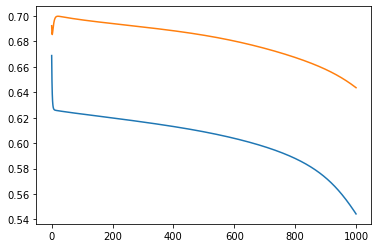

In [ ]:
plt.plot(train_cost_history)
plt.plot(val_cost_history)

# 13.2

In [ ]:
def model(x,w):   
        # feature transformation - switch for dealing
        # with feature transforms that either do or do
        # not have internal parameters
        sig = signature(feature_transforms)
        f = 0
        if len(sig.parameters) == 2:
            f = feature_transforms(x,w[:1])
        else: 
            f = feature_transforms(x)    

        # compute linear combination and return
        # switch for dealing with feature transforms that either 
        # do or do not have internal parameters
        a = 0
        if len(sig.parameters) == 2:
            a = w[2][0] + np.dot(f.T,w[2][1:])
        else:
            a = w[0] + np.dot(f.T,w[1:])
        return a.T

In [ ]:
def multiclass_softmax(w,x,y,iter):     
        # get subset of points
        x_p = x[:,iter]
        y_p = y[:,iter]
        
        # pre-compute predictions on all points
        all_evals = feature_transforms(x_p,w)

        # compute softmax across data points
        a = np.log(np.sum(np.exp(all_evals),axis = 0)) 

        # compute cost in compact form using numpy broadcasting
        b = all_evals[y_p.astype(int).flatten(),np.arange(np.size(y_p))]
        cost = np.sum(a - b)

        # return average
        return cost/float(np.size(y_p))

In [ ]:
datapath = '/content/gdrive/My Drive/sample data/'

In [ ]:
pd.read_csv('/content/gdrive/My Drive/sample data/3_layercake_data.csv')

,4.343317972350230205e-01,3.882488479262672376e-01,4.619815668202764680e-01,5.264976958525345863e-01,4.389400921658985766e-01,4.504608294930875223e-01,4.020737327188940169e-01,4.965437788018433052e-01,4.965437788018433052e-01.1,4.873271889400921930e-01,4.804147465437788034e-01,5.495391705069124777e-01,5.679723502304147020e-01,5.311059907834101423e-01,5.380184331797235320e-01,4.297235023041474644e-01,4.205069124423963522e-01,4.896313364055299155e-01,3.467741935483871218e-01,2.500000000000000000e-01,2.615207373271889457e-01,3.813364055299539590e-01,2.914746543778801713e-01,4.297235023041474644e-01.1,5.979262672811059831e-01,6.739631336405530471e-01,6.739631336405530471e-01.1,5.080645161290322509e-01,3.352534562211981761e-01,4.596774193548387455e-01,5.564516129032258673e-01,6.140552995391704849e-01,3.721198156682027358e-01,3.237327188940092304e-01,3.536866359447005115e-01,4.665898617511521351e-01,5.887096774193548709e-01,5.979262672811059831e-01.1,4.850230414746543595e-01,3.744239631336405694e-01,...,1.278801843317972642e-01.1,1.002304147465437612e-01,1.463133640552995440e-01,7.949308755760370326e-02,2.776497695852534475e-01,9.792626728110598311e-02,5.218894009216590302e-01,7.085253456221197732e-01,8.698156682027650133e-01,8.582949308755759565e-01,8.582949308755759565e-01.1,8.721198156682027358e-01,9.320276497695852980e-01,9.251152073732719083e-01,8.168202764976958408e-01,8.214285714285713969e-01,7.223502304147465525e-01.1,8.260368663594470640e-01,9.066820276497696840e-01,9.182027649769585187e-01,8.790322580645161255e-01,6.463133640552995995e-01,3.513824884792626779e-01,4.758064516129032473e-01,1.094470046082949288e-01,7.718894009216589747e-02,7.718894009216589747e-02.1,9.112903225806451291e-01,8.721198156682027358e-01.1,8.513824884792627889e-01,9.228110599078341858e-01,9.481566820276497998e-01,7.292626728110599421e-01,7.822580645161290036e-01,1.670506912442396574e-01,7.718894009216589747e-02.2,5.080645161290322509e-01.1,7.707373271889400579e-01,6.993087557603686610e-01,6.555299539170507117e-01
0,0.668129,0.595029,0.422515,0.577485,0.597953,0.539474,0.539474,0.428363,0.483918,0.595029,0.662281,0.618421,0.516082,0.545322,0.460526,0.483918,0.434211,0.519006,0.831871,0.738304,0.533626,0.311404,0.402047,0.197368,0.244152,0.422515,0.72076,0.802632,0.805556,0.76462,0.709064,0.559942,0.711988,0.633041,0.486842,0.393275,0.366959,0.410819,0.238304,0.402047,...,0.378655,0.530702,0.489766,0.358187,0.068713,0.027778,0.130117,0.211988,0.229532,0.092105,0.092105,0.211988,0.402047,0.618421,0.752924,0.635965,0.855263,0.934211,0.957602,0.872807,0.887427,0.940058,0.937135,0.969298,0.785088,0.811404,0.638889,0.761696,0.402047,0.52193,0.516082,0.209064,0.033626,0.320175,0.097953,0.165205,0.02193,0.644737,0.77924,0.820175
1,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000


In [ ]:
data = np.loadtxt(datapath + '3_layercake_data.csv', delimiter=',')
x = data[:2,:]
y = data[2,:][np.newaxis,:]

print(np.shape(x))
print(np.shape(y))

(2, 110)
(1, 110)


In [ ]:
# define the number fo units to use in each layer
N = 2         # dimension of input
U_1 = 12      # number of single layer units to employ
U_2 = 5       # number of two layer units to employ

# initialize internal weights of our single layer units
W_1 = 0.1*np.random.randn(N+1,U_1)

# initialize internal weights of our second layer units
W_2 = 0.1*np.random.randn(U_1+1,U_2)

# initialize weights of our linear combination
w_3 = 0.1*np.random.randn(U_2+1,3)

# package all weights together in a single list
w = [W_1,W_2,w_3]

# split into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(x.T,y.T,test_size=0.2)
x_train,x_test,y_train,y_test = x_train.T,x_test.T,y_train.T,y_test.T
print(np.shape(x_train))
print(np.shape(y_train))

(2, 76)
(1, 76)


In [ ]:
def feature_transforms(a, w):    
        # loop through each layer matrix
        for W in w:
            # compute inner product with current layer weights
            a = W[0] + np.dot(a.T, W[1:])

            # output of layer activation
            a = activation(a).T
        return a

In [ ]:
scaler = StandardScaler().fit(x_train)
normalized_x_train = scaler.transform(x_train)
max_its = 500; alpha_choice = 10**(-1)
batch_size = np.size(y_train)
weight_history,train_cost_history,val_cost_history = gradient_descent(multiclass_softmax,w,normalized_x_train,y_train,x_test,y_test,alpha_choice,max_its,batch_size)

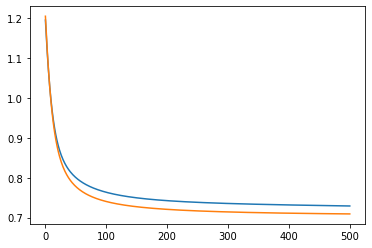

In [ ]:
np.shape(train_cost_history)
plt.plot(train_cost_history)
plt.plot(val_cost_history)

# 13.3

∑
L−1
i=1 (Ui + 1)Ui+1




Data points P should be independent to the calculation of Q As for the input dimension, it contributes to an extra number of parameters
with the first hidden layer So in general, the Q will be (N+1)U1 + ∑
L−1
i=1 (Ui + 1)Ui+1 And no kernal method is used in this calculation 